<a href="https://www.kaggle.com/code/wandererfakeer/08-india-s-top-3-monthly-maximum-salaried-jobs?scriptVersionId=191470566" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/kaggle/input/data-jobs-by-lukebarousse/data_jobs.csv")

df.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."


In [3]:
df["job_posted_date"] = pd.to_datetime(df.job_posted_date)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [4]:
df["job_posted_month"] = df.job_posted_date.dt.to_period("M")

df.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN,2023-06
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",2023-01
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],...",2023-10


In [5]:
india = df[(df["job_country"] == "India") & (df["salary_year_avg"].notna())]

india

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
1209,Machine Learning Engineer,Computer Vision Developer (R&D),"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-02-18 13:12:30,False,False,India,year,79200.0,NaN,Bosch Group,"['python', 'opencv', 'tensorflow', 'pytorch', ...","{'libraries': ['opencv', 'tensorflow', 'pytorc...",2023-02
2022,Data Engineer,Data Engineer - SQL (Power BI),India,via Ai-Jobs.net,Full-time,False,India,2023-10-31 13:09:54,False,False,India,year,156500.0,NaN,Gartner,"['java', 't-sql', 'sql', 'azure', 'power bi', ...","{'analyst_tools': ['power bi', 'dax'], 'async'...",2023-10
2785,Data Engineer,Staff Software Engineer - Data Engineering (Ja...,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-05-26 13:13:28,False,False,India,year,147500.0,NaN,Zscaler,"['java', 'nosql', 'neo4j', 'redshift', 'aws', ...","{'analyst_tools': ['excel'], 'cloud': ['redshi...",2023-05
3190,Senior Data Engineer,Senior Big Data DevOps & Deployment Engineer,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-07-07 13:14:21,False,False,India,year,79200.0,NaN,ServiceNow,"['sql', 'perl', 'bash', 'groovy', 'python', 's...","{'analyst_tools': ['tableau'], 'cloud': ['azur...",2023-07
3930,Data Scientist,Lead Data Scientist,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-12-12 13:27:33,False,False,India,year,114516.0,NaN,Boeing,"['python', 'r', 'c++', 'tensorflow', 'tableau']","{'analyst_tools': ['tableau'], 'libraries': ['...",2023-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783733,Senior Data Scientist,Senior Data Scientist,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-06-27 06:12:11,False,False,India,year,157500.0,NaN,Publicis Groupe,"['aws', 'spark', 'tableau', 'cognos', 'excel',...","{'analyst_tools': ['tableau', 'cognos', 'excel...",2023-06
784033,Data Analyst,Recruitment Data Analyst,"Mumbai, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-06-07 06:10:15,False,False,India,year,111175.0,NaN,Framestore,"['power bi', 'tableau']","{'analyst_tools': ['power bi', 'tableau']}",2023-06
784768,Data Scientist,SR. DATA SCIENTIST,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-01-03 06:25:25,False,False,India,year,157500.0,NaN,Optiv,"['r', 'python', 'sql', 'databricks', 'power bi']","{'analyst_tools': ['power bi'], 'cloud': ['dat...",2023-01
785395,Data Engineer,Senior Consultant - Tech Consulting -Azure Dat...,India,via Ai-Jobs.net,Full-time,False,India,2023-12-19 06:10:41,False,False,India,year,64800.0,NaN,EY,"['sql', 'python', 'azure', 'databricks', 'spar...","{'analyst_tools': ['power bi', 'tableau', 'qli...",2023-12


In [6]:
india.info()

<class 'pandas.core.frame.DataFrame'>
Index: 582 entries, 1209 to 785515
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   job_title_short        582 non-null    object        
 1   job_title              582 non-null    object        
 2   job_location           582 non-null    object        
 3   job_via                582 non-null    object        
 4   job_schedule_type      582 non-null    object        
 5   job_work_from_home     582 non-null    bool          
 6   search_location        582 non-null    object        
 7   job_posted_date        582 non-null    datetime64[ns]
 8   job_no_degree_mention  582 non-null    bool          
 9   job_health_insurance   582 non-null    bool          
 10  job_country            582 non-null    object        
 11  salary_rate            582 non-null    object        
 12  salary_year_avg        582 non-null    float64       
 13  sala

In [8]:
india_data = india.copy()

#gett he pivot table grouped by "job_posted_month" and "job_title_short" with median salary
india_pivot_table_data = india_data.pivot_table(values = "salary_year_avg", index = "job_posted_month", columns = "job_title_short", aggfunc = "median", fill_value = 0)

india_pivot_table_data

job_title_short,Business Analyst,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,
2023-01,0.0,104500.0,147500.00,93600.0,79200.0,111202.0,147500.00,131575.0,79200.0
2023-02,0.0,137478.5,147500.00,122814.0,79200.0,64800.0,147500.00,149653.0,79200.0
2023-03,0.0,93600.0,147500.00,79200.0,157091.0,111175.0,147500.00,153576.5,79200.0
2023-04,0.0,79200.0,96773.00,88128.0,101029.0,0.0,147500.00,86400.0,79200.0
2023-05,0.0,98500.0,147500.00,87705.0,79200.0,111175.0,147500.00,0.0,79200.0
2023-06,79200.0,100500.0,147500.00,157500.0,79200.0,111175.0,147500.00,157500.0,64800.0
2023-07,64800.0,105000.0,114176.50,135500.0,90114.5,79200.0,147500.00,111150.0,79200.0
2023-08,0.0,79200.0,147500.00,132500.0,149653.0,111175.0,147500.00,79200.0,79200.0
2023-09,139216.0,105000.0,147500.00,0.0,90114.5,111175.0,0.00,0.0,109600.0


In [9]:
#get the jobs with maximum salaries
india_top_salaried_jobs = india_data.groupby("job_title_short")["salary_year_avg"].median().sort_values(ascending = False)

#get the top 3 jobs with maximum salaries
india_top_3_salaried_jobs = india_top_salaried_jobs.head(3).index

#convert the core index in list
india_top_3_salaried_jobs = india_top_3_salaried_jobs.to_list()

india_top_3_salaried_jobs

['Senior Data Scientist', 'Data Engineer', 'Senior Data Engineer']

In [10]:
india_top_3_salried_jobs_trend = india_pivot_table_data[india_top_3_salaried_jobs]

india_top_3_salried_jobs_trend

job_title_short,Senior Data Scientist,Data Engineer,Senior Data Engineer
job_posted_month,,,
2023-01,131575.0,147500.00,147500.00
2023-02,149653.0,147500.00,147500.00
2023-03,153576.5,147500.00,147500.00
2023-04,86400.0,96773.00,147500.00
2023-05,0.0,147500.00,147500.00
2023-06,157500.0,147500.00,147500.00
2023-07,111150.0,114176.50,147500.00
2023-08,79200.0,147500.00,147500.00
2023-09,0.0,147500.00,0.00


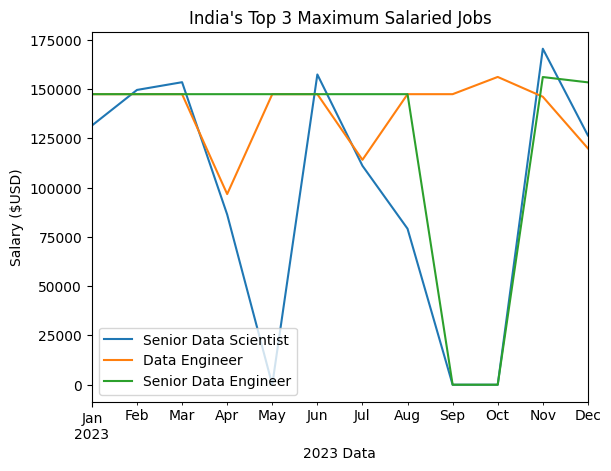

In [11]:
india_top_3_salried_jobs_trend.plot(kind = "line")

plt.title("India's Top 3 Maximum Salaried Jobs")

plt.xlabel("2023 Data")

plt.ylabel("Salary ($USD)")

plt.legend()

plt.show()